# Pytorch workflow 

Lets explore an example PyTorch end-to-end workflow

Resources:
* Ground truth notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Book version of notebook - https://www.learnpytorch.io/01_pytorch_workflow/
* Ask a question - https://github.com/mrdbourke/pytorch-deep-learning/discussions
 

In [1]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"
}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt
import numpy as np
#check pytorch version
torch.__version__

'2.0.1+cpu'

## Data (Preparing and loading)

Data can almost be anything... in machine learning
* Excel spreadsheet
* Images of any kind
* Videos (Youtube has lots of data)
* Audio like songs or podcasts
* DNA
* Text

Machine Learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation

To showcase this, lets create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with *known* **parameters**

In [3]:
# create known parameters
weight = 0.7
bias = 0.3

#create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(1)
y = weight * X +bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

### Splitting the data into train and test sets  ( one of the most import concepts in machine learning in general)

Lets create a training and test set with our data.

In [5]:
#Create a train/test split
train_split = int(0.8 * len(X))
print(train_split)

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(X_test), len(y_train), len(y_test)

40


(40, 10, 40, 10)

How might we better visualize our data?

This is where the data explorers motto comes in!

"Visualize, visualize, visualize!"

In [6]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    """
    Plots training data, test data and compares predictions
    """
    plt.figure(figsize=(10,7))

    #Plot training data in blue
    plt.scatter(train_data, train_labels, c='b', s=4, label = "Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label="Testing data")

    #are these predictions?
    if predictions is not None:
        # Plot predictions if they exist
        plt.scatter(test_data, predictions, c='r',s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size":14})

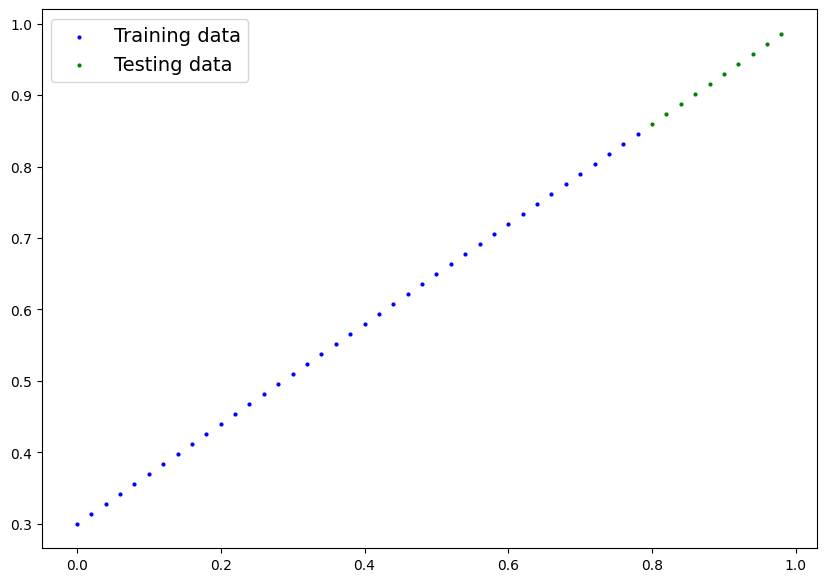

In [7]:
plot_predictions();

## 2. Build model

Our first PyTorch model

Beacuse we are going to be building classes throught the course, I'd recommend getting familiar with OOP in python, to do so you can use the following resource from real python: https://realpython.com/python3-object-oriented-programming/ 

What our model does:
* start with random values (weight and bias)
* Look at the training data and adjust the random  values to better represent (or get closer) to the ideal values (the weight and bias values we used to create the data)

How does it do that?
1. Gradient decent
2. Backpropogation

In [8]:
# Create a Linear regression model class

class LinearRegressionModel(nn.Module): # <- almost everything in Pytorch imports from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype= torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype= torch.float), requires_grad = True)

    # Forward method to define the computation in the model 
    def forward(self, x:torch.Tensor) -> torch.Tensor: # <- "x" is the input data
        return self.weights*x + self.bias #this is the linear regression formula

        

### PyTorch model building essentials

* torch.nn - Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).
* torch.nn.Parameter - what parameter our model should try and learn, often a PyTorch layer from torch.nn will set those for us 
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward
* torch.optim - this is  where the optimizers in Pytorch live, they will help with gradient decent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation 

See more of these essential modules via the PyTorch cheatsheet - https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of our PyTorch model

Now we've created a model let's see what's inside...

So we can check our model parameters or whats inside our model using '.Parameters()'


In [9]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using 'torch.inference_mode()'

To check our models predicitve power, lets see how it predicts 'y_test' based on 'X_test'. 

When we pass data through our model, its going to run it through the forward() method.

In [11]:
# Make predictions with the model 
with torch.inference_mode():
    y_preds = model_0(X_test)

# you can also do something similar with torch.no_grad(), however torch.inference_mode() is preferred
with torch.no_grad():
    y_preds = model_0(X_test)

y_preds, y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

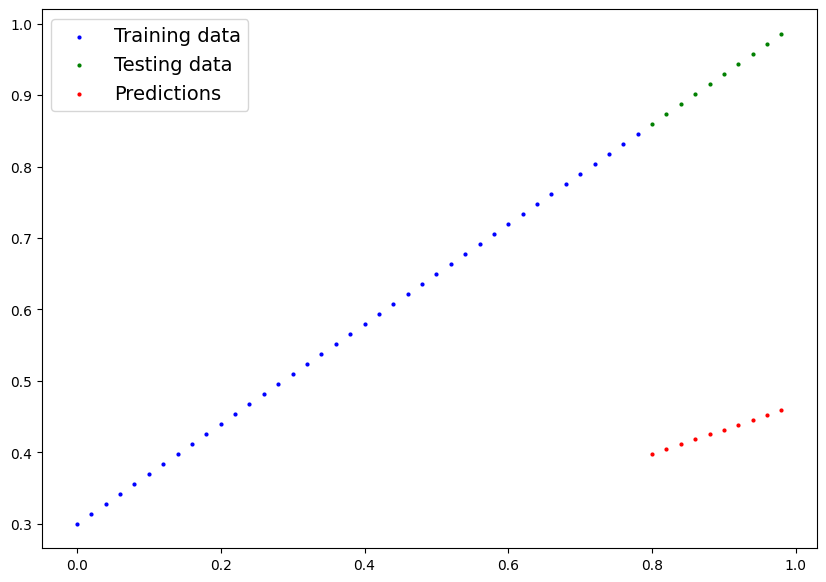

In [12]:
plot_predictions(predictions = y_preds)

## 3.Train Model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.PendingDeprecationWarning

Or in other words from a poor representation of the data to a better representation of the data

One way to measure how poor or how wrong your models predictions are is to use a loss function.

Things we need to train:

* **Loss function:** A function to measure how wrong your models predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the models parameters (e.g. weight and bias) to improve the loss function

And we'll use SGD, torch.optim.SGD(params, lr) where:

* 'params' is the target model parameters you'd like to optimize (e.g. the weights and bias values we randomly set before).
* 'lr' is the learning rate you'd like the optimizer to update the parameters at, higher means the optimizer will try larger updates (these can sometimes be too large and the optimizer will fail to work), lower means the optimizer will try smaller updates (these can sometimes be too small and the optimizer will take too long to find the ideal values). The learning rate is considered a hyperparameter (because it's set by a machine learning engineer). Common starting values for the learning rate are 0.01, 0.001, 0.0001, however, these can also be adjusted over time (this is called learning rate scheduling).

And specifically for PyTorch we need:
* A training loop
* A testing loop

In [13]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [14]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [15]:
# setup a loss function
loss_fn = nn.L1Loss()
#setup an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(), # parameters of target model to optimize
                             lr = 0.01) # learning rate (how much the optimizer should change parameters at each step, high

### Building a training lopp ( and testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data 
1. Forward pass (this involves data moving through our model's 'forward()' functions) - also called forward propogation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropogation**)
5. Optimizer step - use the optimizer to adjust our models parameters to try and improve the loss (**gradient decent**)

In [16]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)
# an epoch is one loop through the data.. (this is a hyperparameter beacuse we've set it ourselves)
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []
### Training
# 0. Loop through the data
for epoch in range(epochs):
    # set the model to training mode 
    model_0.train() # train mode in pytorch sets all parameters that require gradients to require gradients
    
    # 1. Forward pass
    y_pred = model_0(X_train)
    
    # 2. Calculate the loss
    loss = loss_fn(y_pred,y_train)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Perform back propohation on the model with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform graaadient descent)
    optimizer.step() 
    # by deafult how the optimizer changes will accumulate through the loop.. so we have to zero them above in step 3 fo the next iteration of the loop

    ### Testing
    model_0.eval() # turns off different settings in the model not needed for evaluation/testing (droupout/ batch norm layers)

    with torch.inference_mode(): #turns off gradient tracking and a couple more things behind the scenes
        # 1. do the forward pass
       test_pred = model_0(X_test)

       # 2. Calculate the loss
       test_loss = loss_fn(test_pred, y_test)

    # Print out
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
        # print out model state dict
        print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

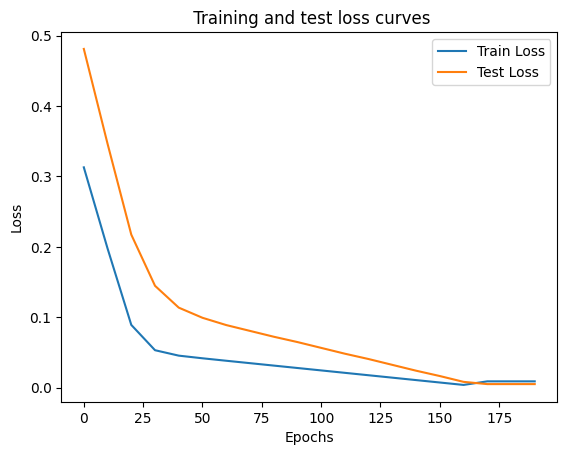

In [19]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = 'Train Loss')
plt.plot(epoch_count, test_loss_values, label = 'Test Loss')
plt.title(" Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [ ]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

In [ ]:
model_0.state_dict()

In [ ]:
weight, bias

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
plot_predictions(predictions=y_preds_new)